## Computer Vision I
### Trabajo Práctico VI


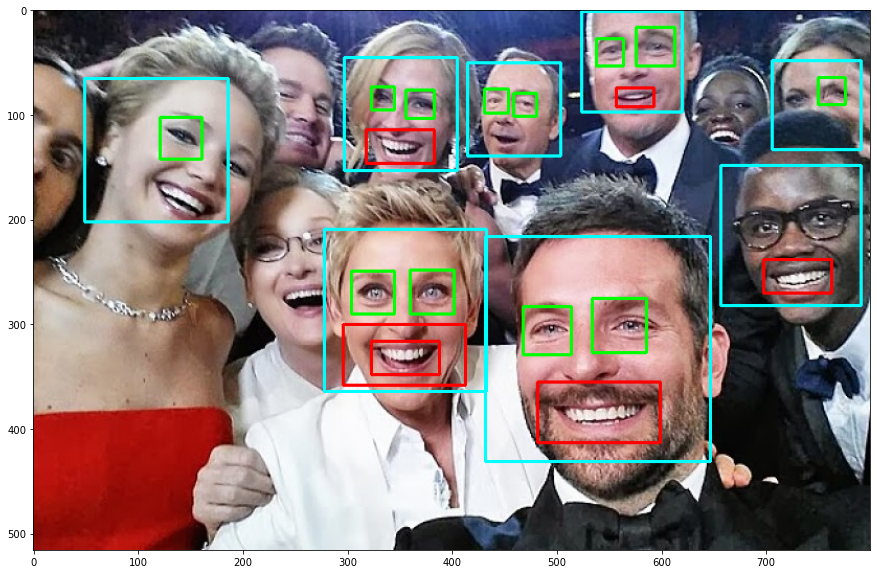

In [7]:
import cv2 as cv
import time
import matplotlib.pyplot as plt

# Leemos los clasificadores pre-entrenados (instalados en cv2/data/haarcascades/)
#--------------------------------------------------------------------------------
face_cascade = cv.CascadeClassifier('C://Users/alfon/AppData/Local/Programs/Python/Python38/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('C://Users/alfon/AppData/Local/Programs/Python/Python38/Lib/site-packages/cv2/data/haarcascade_eye.xml')
smile_cascade = cv.CascadeClassifier('C://Users/alfon/AppData/Local/Programs/Python/Python38/Lib/site-packages/cv2/data/haarcascade_smile.xml')
eye_glasses_cascade = cv.CascadeClassifier('C://Users/alfon/AppData/Local/Programs/Python/Python38/Lib/site-packages/cv2/data/haarcascade_eye_tree_eyeglasses.xml')

# Cargamos la imagen a analizar
# ------------------------------
originalImage = cv.imread('Images/Faces/oscars.jpg')

# Pasamos la imagen a escala de grises
# -------------------------------------
grayImage = cv.cvtColor(originalImage, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(grayImage, 5)
grayImage = cv.equalizeHist(grayImage)

# Llamamos al clasificador de Haar (AdaBoost)
# --------------------------------------------
# faces = face_cascade.detectMultiScale(grayImage, 1.012, 5)
faces = face_cascade.detectMultiScale(grayImage)  # , minSize= (100,130),maxSize=(200,400))

# Recorro las caras encontradas
# ------------------------------
for (x, y, w, h) in faces:
    # Le dibujamos un rectángulo amarillo
    cv.rectangle(originalImage, (x, y), (x + w, y + h), (255, 255, 0), 2)
    # Definimos las ROIs en la imagen gris y color
    roi_gray = grayImage[y:y + h, x:x + w]
    roi_color = originalImage[y:y + h, x:x + w]
    # Para cada rostro hallado le buscamos los ojos
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1)
    smile = smile_cascade.detectMultiScale(roi_gray, 1.8, 8)
    #eye_glases = eye_glasses_cascade.detectMultiScale(roi_gray, 1.1)
    # En los ojos hallados les dibujamos rectángulos
    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    for (sx, sy, sw, sh) in smile:
        cv.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)
    #for (egx, egy, egw, egh) in eye_glases:
    #    cv.rectangle(roi_color, (egx, egy), (egx + egw, egy + egh), (255, 0, 255), 2)

fig1, ax1 = plt.subplots(figsize=(15, 15))
plt.imshow(cv.cvtColor(originalImage, cv.COLOR_BGR2RGB))
